In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [8]:
balls = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
matches = pd.read_csv('IPL_Matches_2008_2022.csv')

In [9]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [11]:
matches.shape

(950, 20)

In [12]:
print(matches.isnull().sum())

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64


In [14]:
matches[matches['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [18]:
matches.drop(['City', 'ID', 'method'], axis = 1, inplace =True)

In [20]:
 matches= matches.dropna()

In [22]:
matches.shape

(932, 17)

In [25]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))
matches.drop(['Season'], axis = 1, inplace = True)

In [27]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [28]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [29]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [30]:
print(balls.isna().sum())

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64


In [31]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Ashish Reddy,196
A Badoni,139
A Chandila,7
A Chopra,75
A Choudhary,20


In [32]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,139,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [33]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,139,2,161
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [34]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Ashish Reddy,196,2,280,61.0
A Badoni,139,2,161,57.0
A Chandila,7,1,4,3.0
A Chopra,75,2,53,45.0
A Choudhary,20,2,25,4.0


In [35]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0


In [36]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


In [37]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


In [38]:
bowlgroup = balls.groupby(['bowler'])

In [39]:
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [40]:
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [41]:
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [43]:
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Ashish Reddy,270,18.0
A Badoni,12,2.0
A Chandila,234,11.0
A Choudhary,108,5.0
A Dananjaya,25,NaN


In [44]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [45]:
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Ashish Reddy,270,18.0,45.0
A Badoni,12,2.0,2.0
A Chandila,234,11.0,39.0
A Choudhary,108,5.0,18.0
A Dananjaya,25,0.0,4.0


In [46]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,386
A Badoni,12,2.0,2.0,11
A Chandila,234,11.0,39.0,242
A Choudhary,108,5.0,18.0,137
A Dananjaya,25,0.0,4.0,46


In [47]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [48]:
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0


In [49]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf


In [50]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [51]:
final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134


In [52]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [53]:
catchDf.head()

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0


In [54]:
# Merging Batsman Stat
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [60]:
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [61]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

In [66]:
matches = pd.read_csv('IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

<Axes: >

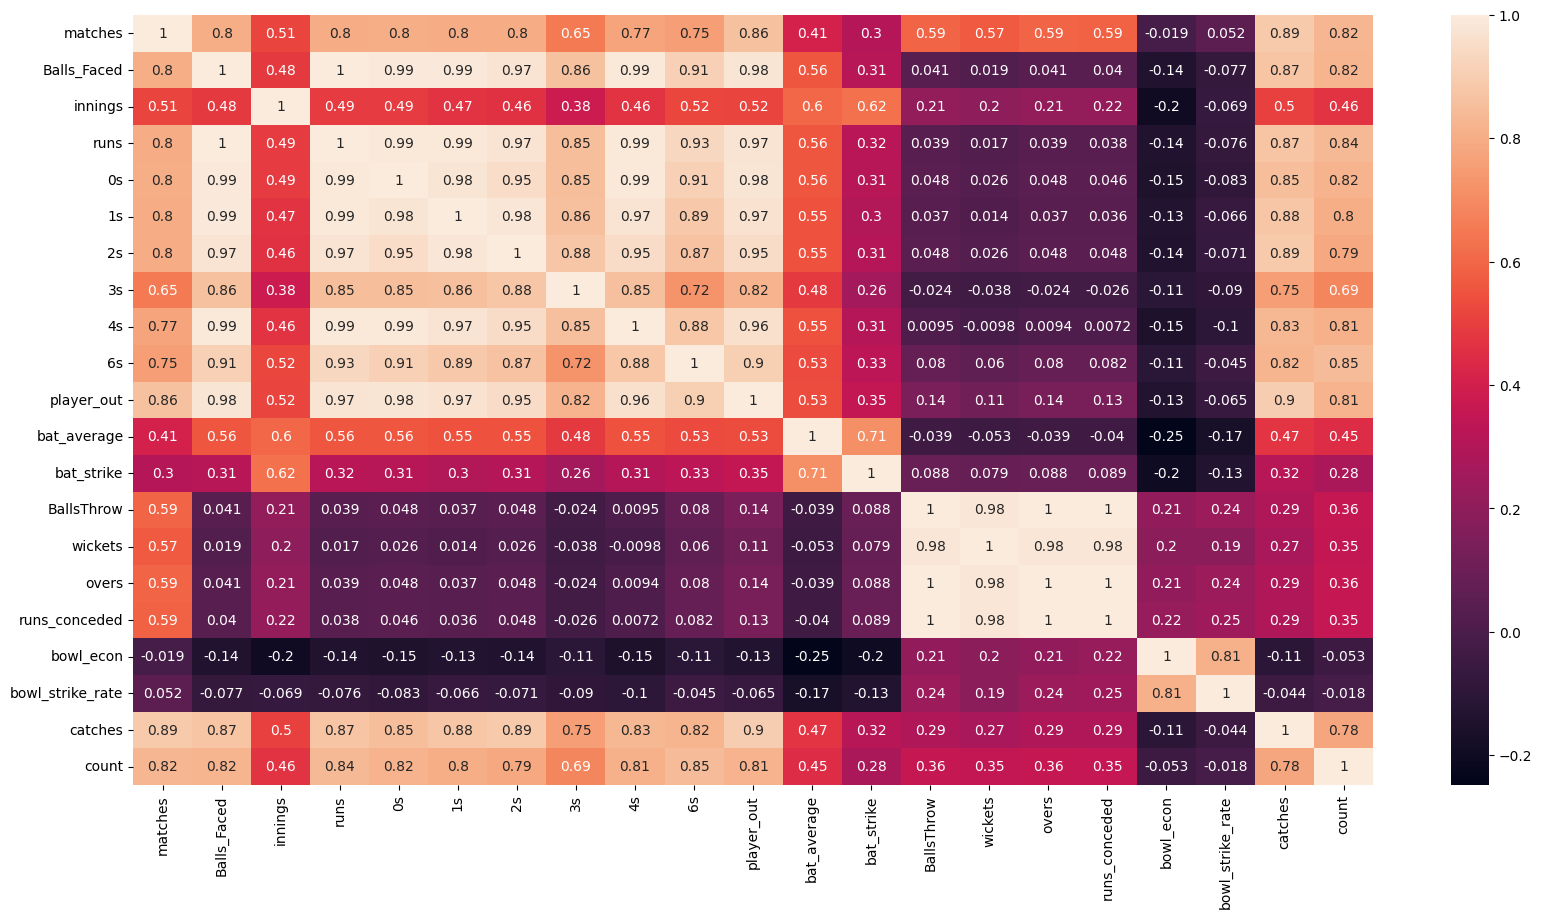

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [68]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [64]:
corr_cols = correlation(final_df,0.85)
corr_cols

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [69]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

KeyError: "['not_out'] not found in axis"

In [70]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

NameError: name 'top_columns' is not defined